# Inspiser problematiske linjer

## Ingen prediksjon

In [1]:
from pathlib import Path
import pandas as pd
from PIL import Image

data_p = Path("../data/line_level/test")

models = ["transkribus_med_base", "transkribus_uten_base", "nor_smx_205", "nor_smx_200"]

for model_dir in Path("../output/evaluation/line_level").iterdir():
    if model_dir.name not in models:
        continue
    df = pd.read_csv(model_dir / "row_level.csv")
    df = df[df.transcription.isna()]
    print(f"Antall problematiske linjer:    {len(df)}\n--------")

    for e in df.itertuples():
        try:
            img = next(data_p.glob(f"*{e.image}"))
        except Exception as _:
            print(f"Fant ikke bildet {e.image} i {data_p}")
            continue
        print(e.image)
        print(f"Fasit:      {e.ground_truth}")
        img = Image.open(img)
        display(img)
        print("--------\n")

Antall problematiske linjer:    0
--------
Antall problematiske linjer:    0
--------
Antall problematiske linjer:    0
--------
Antall problematiske linjer:    0
--------


## For høy relativ Levenstein avstand

transkribus_med_base
Antall problematiske linjer:    1
--------
Fasit:      44
Prediksjon: 1444


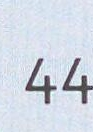

--------

nor_smx_206
Antall problematiske linjer:    0
--------
nor_smx_201
Antall problematiske linjer:    0
--------
transkribus_uten_base
Antall problematiske linjer:    0
--------


In [6]:
import pandas as pd
from find_bad_boxes import relative_edit_distance_too_big
from utils import clean_transcriptions
from PIL import Image
from pathlib import Path

data_p = Path("../data/line_level/test")
threshold = 0.5

models = ["transkribus_med_base", "transkribus_uten_base", "nor_smx_201", "nor_smx_206"]

for model_dir in Path("../output/evaluation/line_level").iterdir():
    if model_dir.name not in models:
        continue
    print(model_dir.name)
    df = pd.read_csv(model_dir / "row_level.csv")
    df["transcription"] = clean_transcriptions(df.transcription)
    df = relative_edit_distance_too_big(df, threshold=threshold)
    print(f"Antall problematiske linjer:    {len(df)}\n--------")

    for e in df.itertuples():
        img = next(data_p.glob(f"*{e.image}"), None)
        if not img:
            img = next(data_p.glob(f"*{Path(e.image).stem[:-20]}*.tif"), None)
            if not img:
                print(f"Fant ikke bildet {e.image} i {data_p}")
                continue
        print(f"Fasit:      {e.ground_truth}")
        print(f"Prediksjon: {e.transcription}")

        img = Image.open(img)
        display(img)
        print("--------\n")

## Første tegn feil

In [8]:
import pandas as pd
from find_bad_boxes import first_char_different
from utils import clean_transcriptions
from PIL import Image
from pathlib import Path

data_p = Path("../data/line_level/test")

models = ["transkribus_med_base", "transkribus_uten_base", "nor_smx_201", "nor_smx_206"]


for model_dir in Path("../output/evaluation/line_level").iterdir():
    if model_dir.name not in models:
        continue
    print(model_dir.name)
    df = pd.read_csv(model_dir / "row_level.csv")
    df["transcription"] = clean_transcriptions(df.transcription)
    df = first_char_different(df)
    print(f"Antall problematiske linjer:    {len(df)}\n--------")

    # for e in df.itertuples():
    #     try:
    #         img = next(data_p.glob(f"*{e.image}"))
    #     except Exception as _:
    #         print(f"Fant ikke bildet {e.image} i {data_p}")
    #         continue
    #     print(f"Fasit:      {e.ground_truth}")
    #     print(f"Prediksjon: {e.transcription}")

    #     img = Image.open(img)
    #     display(img)
    #     print("--------\n")

transkribus_med_base
Antall problematiske linjer:    9
--------
nor_smx_206
Antall problematiske linjer:    15
--------
nor_smx_201
Antall problematiske linjer:    19
--------
transkribus_uten_base
Antall problematiske linjer:    9
--------


## Siste tegn feil

transkribus_med_base
Antall problematiske linjer:    2
--------
Fasit:      Poava ii liikon dasa maid Hus barggai. Son
Prediksjon: Poava ii liikon dasa maid Hus barggai. Sor.


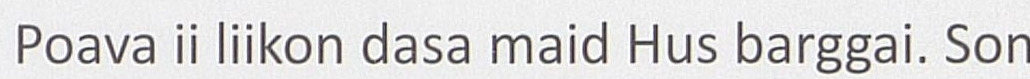

--------

Fasit:      STARUMA LADY
Prediksjon: STARUMA LAD


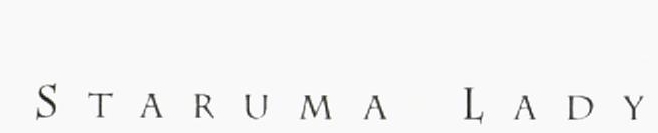

--------

nor_smx_205
Antall problematiske linjer:    6
--------
Fasit:      meeccist ubâ lekken. Täst ij lah kulâ muh ko vyelgiđ
Prediksjon: meeccist ubå lekken. Täst ij lah kulâ muh ko vyelgid


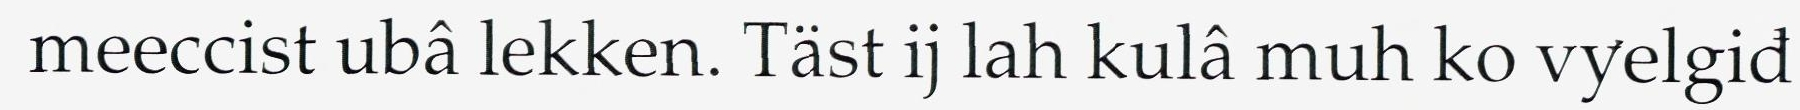

--------

Fasit:      stuorrâ Aanaar riddoost koddepiivdost já lâi finnim-uv maŋgâ ellee njuovvâđ
Prediksjon: stuorrå Aanaar riddoost koddepiivdost já lái finnim-uv maŋgåâ ellee njuovvâd


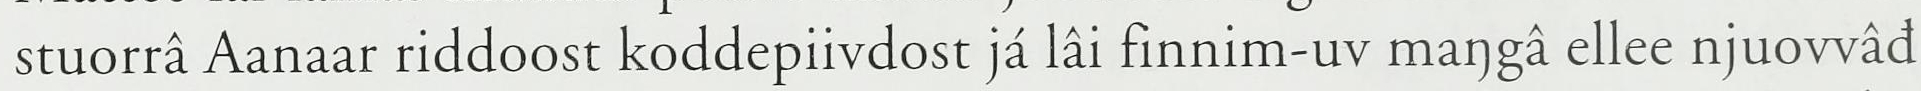

--------

Fasit:      váikkuhus virggálaš skuvlensystemii, muhto buorebutge báikkálaččat. Almmá
Prediksjon: váikkuhus virggálaš skuvlensystemii, muhto buorebutge báikkálaččat. Almmá-


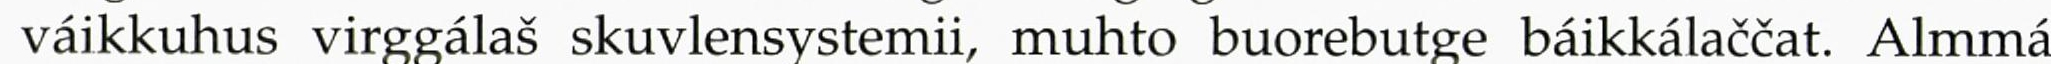

--------

Fasit:      tääbbin pähinij enâmist ton tiet, et oskottemeh, nuuvtgo tun-uv finniiččijd
Prediksjon: tääbbin pähinij enâmist ton tiet, et oskottemeh, nuuvtgo tun-uv finniiččijd.


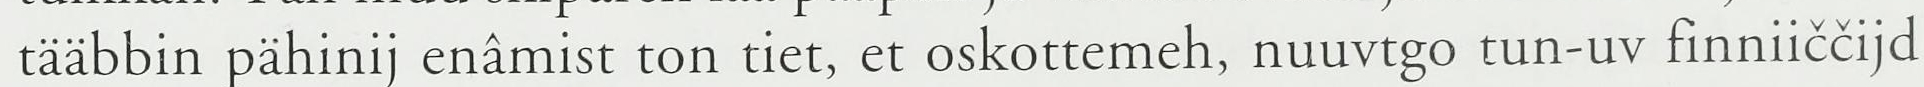

--------

Fasit:      vuojnnet. Gå la bæjvádahka ja tjáppa dálkke, de sån ij jáhke dakkir
Prediksjon: vuojnnet. Gå la bæjvádahka ja tjáppa dálkke, de sån ij jáhke dakkin


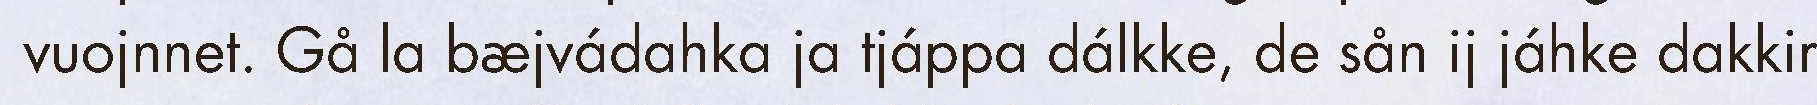

--------

Fasit:      anneeđ kieđâin, te jienâ ij innig almostum. Jovnâ ferttij vyelgiđ
Prediksjon: anneed kieđâin, te jienâ ij innig almostum. Jovnâ ferttij vyelgid


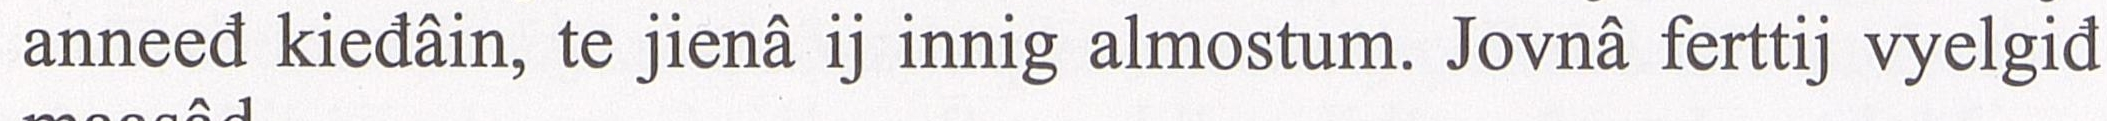

--------



In [4]:
import pandas as pd
from find_bad_boxes import last_char_different
from utils import clean_transcriptions
from PIL import Image
from pathlib import Path

data_p = Path("../data/line_level/test")


models = ["transkribus_med_base", "transkribus_uten_base", "nor_smx_201", "nor_smx_206"]


for model_dir in Path("../output/evaluation/line_level").iterdir():
    if model_dir.name not in models:
        continue
    print(model_dir.name)
    df = pd.read_csv(model_dir / "row_level.csv")
    df["transcription"] = clean_transcriptions(df.transcription)
    df = last_char_different(df)
    print(f"Antall problematiske linjer:    {len(df)}\n--------")

    # for e in df.itertuples():
    #     try:
    #         img = next(data_p.glob(f"*{e.image}"))
    #     except Exception as _:
    #         print(f"Fant ikke bildet {e.image} i {data_p}")
    #         continue
    #     print(f"Fasit:      {e.ground_truth}")
    #     print(f"Prediksjon: {e.transcription}")

    #     img = Image.open(img)
    #     display(img)
    #     print("--------\n")